# Facial Recognition - Simple neural network

Neural networks are generally considered state of the art for image recognition. There are lots of flavors of neural networks. In this notebook I will just build vanilla feed forward neural networks with up to 5 hidden layers, and I'll test out different l2 regularization penalties. I'll be using the keras package which makes it super easy to prototype neural networks.

In [1]:
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.optimizers import SGD
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import pickle

C:\Users\Bober\Anaconda2\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
traindata = pd.DataFrame(pickle.load(open('data\TrainData.p','rb')))
traindata = traindata.sample(n = len(traindata))
testdata = pd.DataFrame(pickle.load(open('data\TestData.p','rb')))

In [3]:
Xtrain, ytrain = traindata.iloc[:,0:2304], traindata.iloc[:,2304]
Xtest, ytest = testdata.iloc[:,0:2304], testdata.iloc[:,2304]

In [4]:
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [5]:
print(traindata.shape)
print(testdata.shape)

(31761, 2305)
(7178, 2305)


In [6]:
optimizer = SGD(lr=1e-3, momentum=0.9)

I'll use stochastic gradient descent with batches of 100 and a momentum of 0.9. It's common to use more advanced optimizers like ADAM which adjust the learning rate over training epochs, however I saw a paper that suggested that even though ADAM/RMSprop/other adaptive methods train faster with better training accuracy, they are often slightly less generalizable. So I'll just stick with SGD.

Keras makes creating neural networks incredibly easy. We define a sequential model, and then, as the name suggests, add each layer in sequence. I'll use hidden layers with relu activation. The final layer will use the softmax to output predictions that add to one, and then the result will just be the output corresponding with the highest value.

In [7]:
def create_model(hidden_layers = (100,100)):
    '''
    Simple function to create a neural network with relu hidden activation and softmax output.
    '''
    model = Sequential()
    for layer, n_nodes in enumerate(hidden_layers):
        if layer == 0:
            print('adding hidden layer')
            model.add(Dense(n_nodes, input_dim=2304, activation='relu'))
        else:
            print('adding hidden layer')
            model.add(Dense(n_nodes, input_dim = hidden_layers[layer-1], activation = 'relu'))
            
    print('adding output layer')
    model.add(Dense(7,activation='softmax', input_dim = hidden_layers[layer-1]))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])
    return model

In [8]:
ann_1hiddenlayer = create_model([100])

adding hidden layer
adding output layer


In [9]:
history = ann_1hiddenlayer.fit(Xtrain,ytrain, epochs = 100,verbose = 1,validation_split=0.2, batch_size=100)

Train on 25408 samples, validate on 6353 samples
Epoch 1/100
25408/25408 [==============================] - 3s 114us/step - loss: 1.9076 - categorical_accuracy: 0.2301 - val_loss: 1.8691 - val_categorical_accuracy: 0.2487
Epoch 2/100
25408/25408 [==============================] - 1s 42us/step - loss: 1.8478 - categorical_accuracy: 0.2670 - val_loss: 1.8327 - val_categorical_accuracy: 0.2851
Epoch 3/100
25408/25408 [==============================] - 1s 42us/step - loss: 1.8102 - categorical_accuracy: 0.2931 - val_loss: 1.8028 - val_categorical_accuracy: 0.3172
Epoch 4/100
25408/25408 [==============================] - 1s 47us/step - loss: 1.7821 - categorical_accuracy: 0.3159 - val_loss: 1.7849 - val_categorical_accuracy: 0.3117
Epoch 5/100
25408/25408 [==============================] - 1s 42us/step - loss: 1.7586 - categorical_accuracy: 0.3267 - val_loss: 1.7763 - val_categorical_accuracy: 0.3187
Epoch 6/100
25408/25408 [==============================] - 1s 41us/step - loss: 1.7443 - c

25408/25408 [==============================] - 1s 42us/step - loss: 1.2266 - categorical_accuracy: 0.5493 - val_loss: 1.4835 - val_categorical_accuracy: 0.4407
Epoch 96/100
25408/25408 [==============================] - 1s 41us/step - loss: 1.2200 - categorical_accuracy: 0.5532 - val_loss: 1.4593 - val_categorical_accuracy: 0.4560
Epoch 97/100
25408/25408 [==============================] - 1s 44us/step - loss: 1.2142 - categorical_accuracy: 0.5547 - val_loss: 1.4450 - val_categorical_accuracy: 0.4571
Epoch 98/100
25408/25408 [==============================] - 1s 43us/step - loss: 1.2127 - categorical_accuracy: 0.5561 - val_loss: 1.4653 - val_categorical_accuracy: 0.4467
Epoch 99/100
25408/25408 [==============================] - 1s 42us/step - loss: 1.2125 - categorical_accuracy: 0.5560 - val_loss: 1.4663 - val_categorical_accuracy: 0.4499
Epoch 100/100
25408/25408 [==============================] - 1s 42us/step - loss: 1.2072 - categorical_accuracy: 0.5560 - val_loss: 1.4387 - val_cat

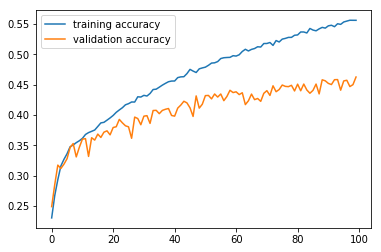

In [10]:
plt.plot(history.history['categorical_accuracy'], label = 'training accuracy')
plt.plot(history.history['val_categorical_accuracy'], label = 'validation accuracy')
plt.legend()

We can see after 100 epochs that the validation accuracy is starting to level out while training accuracy still was steadily improving. This suggests overfitting. But how sensitive is the network to the number of nodes? Let's try 500 nodes in the hidden layer instead of 100.

In [12]:
ann_1hiddenlayer = create_model([500])
history = ann_1hiddenlayer.fit(Xtrain,ytrain, epochs = 100,verbose = 1,validation_split=0.2, batch_size=100)

adding hidden layer
adding hidden layer
Train on 25408 samples, validate on 6353 samples
Epoch 1/100
25408/25408 [==============================] - 1s 51us/step - loss: 1.8810 - categorical_accuracy: 0.2497 - val_loss: 1.8249 - val_categorical_accuracy: 0.2888
Epoch 2/100
25408/25408 [==============================] - 1s 45us/step - loss: 1.8089 - categorical_accuracy: 0.2959 - val_loss: 1.7864 - val_categorical_accuracy: 0.3084
Epoch 3/100
25408/25408 [==============================] - 1s 46us/step - loss: 1.7741 - categorical_accuracy: 0.3188 - val_loss: 1.7616 - val_categorical_accuracy: 0.3356
Epoch 4/100
25408/25408 [==============================] - 1s 44us/step - loss: 1.7481 - categorical_accuracy: 0.3295 - val_loss: 1.7459 - val_categorical_accuracy: 0.3233
Epoch 5/100
25408/25408 [==============================] - 1s 44us/step - loss: 1.7278 - categorical_accuracy: 0.3433 - val_loss: 1.7146 - val_categorical_accuracy: 0.3476
Epoch 6/100
25408/25408 [==========================

Epoch 48/100
25408/25408 [==============================] - 1s 43us/step - loss: 1.3370 - categorical_accuracy: 0.5084 - val_loss: 1.4768 - val_categorical_accuracy: 0.4494
Epoch 49/100
25408/25408 [==============================] - 1s 42us/step - loss: 1.3289 - categorical_accuracy: 0.5149 - val_loss: 1.4612 - val_categorical_accuracy: 0.4614
Epoch 50/100
25408/25408 [==============================] - 1s 45us/step - loss: 1.3253 - categorical_accuracy: 0.5139 - val_loss: 1.4659 - val_categorical_accuracy: 0.4546
Epoch 51/100
25408/25408 [==============================] - 1s 46us/step - loss: 1.3139 - categorical_accuracy: 0.5183 - val_loss: 1.4719 - val_categorical_accuracy: 0.4518
Epoch 52/100
25408/25408 [==============================] - 1s 44us/step - loss: 1.3129 - categorical_accuracy: 0.5175 - val_loss: 1.4528 - val_categorical_accuracy: 0.4648
Epoch 53/100
25408/25408 [==============================] - 1s 42us/step - loss: 1.3037 - categorical_accuracy: 0.5242 - val_loss: 1.47

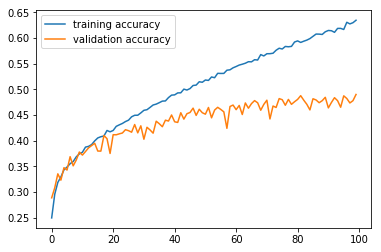

In [13]:
plt.plot(history.history['categorical_accuracy'], label = 'training accuracy')
plt.plot(history.history['val_categorical_accuracy'], label = 'validation accuracy')
plt.legend()

The results are actually quite similar. Since we're seeing overfitting how about if we include some regularization?

In [14]:
def create_regularized_model(hidden_layers = (100,100),l2 = .1):
    '''
    Same model as above but includes l2 regularization on the weights.
    '''
    model = Sequential()
    for layer, n_nodes in enumerate(hidden_layers):
        if layer == 0:
            print('adding hidden layer')
            model.add(Dense(n_nodes, input_dim=2304, activation='relu',kernel_regularizer=regularizers.l2(l2)))
        else:
            print('adding hidden layer')
            model.add(Dense(n_nodes, input_dim = hidden_layers[layer-1], activation = 'relu',
                            kernel_regularizer=regularizers.l2(l2)))
    print('adding output layer')
    model.add(Dense(7,input_dim = hidden_layers[layer-1],activation='softmax', kernel_regularizer=regularizers.l2(l2)))
    model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics=['categorical_accuracy'])
    return model

In [15]:
ann_1hiddenlayer_reg = create_regularized_model([100], l2 = 0.1)
history = ann_1hiddenlayer_reg.fit(Xtrain,ytrain, epochs = 100,verbose = 1,validation_split=0.2, batch_size=100)

adding hidden layer
adding output layer
Train on 25408 samples, validate on 6353 samples
Epoch 1/100
25408/25408 [==============================] - 1s 49us/step - loss: 15.1721 - categorical_accuracy: 0.2247 - val_loss: 9.4138 - val_categorical_accuracy: 0.2330
Epoch 2/100
25408/25408 [==============================] - 1s 40us/step - loss: 6.5966 - categorical_accuracy: 0.2311 - val_loss: 4.5622 - val_categorical_accuracy: 0.2345
Epoch 3/100
25408/25408 [==============================] - 1s 41us/step - loss: 3.5722 - categorical_accuracy: 0.2278 - val_loss: 2.8521 - val_categorical_accuracy: 0.2319
Epoch 4/100
25408/25408 [==============================] - 1s 42us/step - loss: 2.5039 - categorical_accuracy: 0.2261 - val_loss: 2.2454 - val_categorical_accuracy: 0.2331
Epoch 5/100
25408/25408 [==============================] - 1s 43us/step - loss: 2.1254 - categorical_accuracy: 0.2258 - val_loss: 2.0302 - val_categorical_accuracy: 0.2330
Epoch 6/100
25408/25408 [=========================

Epoch 48/100
25408/25408 [==============================] - 1s 43us/step - loss: 1.9049 - categorical_accuracy: 0.2257 - val_loss: 1.9001 - val_categorical_accuracy: 0.2330
Epoch 49/100
25408/25408 [==============================] - 1s 42us/step - loss: 1.9046 - categorical_accuracy: 0.2257 - val_loss: 1.9001 - val_categorical_accuracy: 0.2330
Epoch 50/100
25408/25408 [==============================] - 1s 47us/step - loss: 1.9046 - categorical_accuracy: 0.2257 - val_loss: 1.8999 - val_categorical_accuracy: 0.2330
Epoch 51/100
25408/25408 [==============================] - 1s 45us/step - loss: 1.9048 - categorical_accuracy: 0.2257 - val_loss: 1.9002 - val_categorical_accuracy: 0.2330
Epoch 52/100
25408/25408 [==============================] - 1s 41us/step - loss: 1.9046 - categorical_accuracy: 0.2257 - val_loss: 1.9002 - val_categorical_accuracy: 0.2330
Epoch 53/100
25408/25408 [==============================] - 1s 40us/step - loss: 1.9045 - categorical_accuracy: 0.2257 - val_loss: 1.90

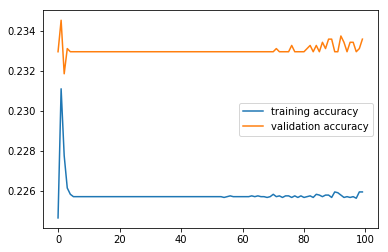

In [16]:
plt.plot(history.history['categorical_accuracy'], label = 'training accuracy')
plt.plot(history.history['val_categorical_accuracy'], label = 'validation accuracy')
plt.legend()

Clearly this l2 penalty is too harsh. We learned nothing.

In [17]:
ann_1hiddenlayer_reg = create_regularized_model([100], l2 = .01)
history = ann_1hiddenlayer_reg.fit(Xtrain,ytrain, epochs = 100,verbose = 1,validation_split=0.2, batch_size=100)

adding hidden layer
adding output layer
Train on 25408 samples, validate on 6353 samples
Epoch 1/100
25408/25408 [==============================] - 1s 50us/step - loss: 3.8491 - categorical_accuracy: 0.2363 - val_loss: 3.7085 - val_categorical_accuracy: 0.2679
Epoch 2/100
25408/25408 [==============================] - 1s 45us/step - loss: 3.6038 - categorical_accuracy: 0.2742 - val_loss: 3.4944 - val_categorical_accuracy: 0.2803
Epoch 3/100
25408/25408 [==============================] - 1s 43us/step - loss: 3.4082 - categorical_accuracy: 0.2953 - val_loss: 3.3051 - val_categorical_accuracy: 0.3261
Epoch 4/100
25408/25408 [==============================] - 1s 41us/step - loss: 3.2371 - categorical_accuracy: 0.3114 - val_loss: 3.1542 - val_categorical_accuracy: 0.3317
Epoch 5/100
25408/25408 [==============================] - 1s 43us/step - loss: 3.0889 - categorical_accuracy: 0.3199 - val_loss: 3.0118 - val_categorical_accuracy: 0.3272
Epoch 6/100
25408/25408 [==========================

Epoch 48/100
25408/25408 [==============================] - 1s 41us/step - loss: 1.7762 - categorical_accuracy: 0.3765 - val_loss: 1.7753 - val_categorical_accuracy: 0.3863
Epoch 49/100
25408/25408 [==============================] - 1s 41us/step - loss: 1.7730 - categorical_accuracy: 0.3814 - val_loss: 1.7740 - val_categorical_accuracy: 0.3863
Epoch 50/100
25408/25408 [==============================] - 1s 42us/step - loss: 1.7717 - categorical_accuracy: 0.3798 - val_loss: 1.7710 - val_categorical_accuracy: 0.3751
Epoch 51/100
25408/25408 [==============================] - 1s 41us/step - loss: 1.7728 - categorical_accuracy: 0.3791 - val_loss: 1.7805 - val_categorical_accuracy: 0.3784
Epoch 52/100
25408/25408 [==============================] - 1s 43us/step - loss: 1.7691 - categorical_accuracy: 0.3807 - val_loss: 1.7744 - val_categorical_accuracy: 0.3798
Epoch 53/100
25408/25408 [==============================] - 1s 42us/step - loss: 1.7704 - categorical_accuracy: 0.3792 - val_loss: 1.77

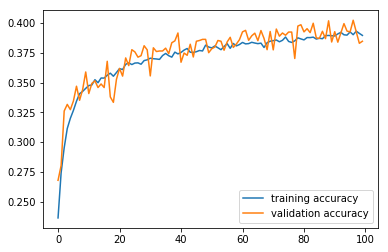

In [18]:
plt.plot(history.history['categorical_accuracy'], label = 'training accuracy')
plt.plot(history.history['val_categorical_accuracy'], label = 'validation accuracy')
plt.legend()

This penalty seems to prevent overfitting. It seems there is more to learn after 100 epochs. What about if we go smaller?

In [19]:
ann_1hiddenlayer_reg = create_regularized_model([100], l2 = .001)
history = ann_1hiddenlayer_reg.fit(Xtrain,ytrain, epochs = 100,verbose = 1,validation_split=0.2, batch_size=100)

adding hidden layer
adding output layer
Train on 25408 samples, validate on 6353 samples
Epoch 1/100
25408/25408 [==============================] - 1s 49us/step - loss: 2.1001 - categorical_accuracy: 0.2377 - val_loss: 2.0650 - val_categorical_accuracy: 0.2759
Epoch 2/100
25408/25408 [==============================] - 1s 43us/step - loss: 2.0326 - categorical_accuracy: 0.2790 - val_loss: 1.9971 - val_categorical_accuracy: 0.3019
Epoch 3/100
25408/25408 [==============================] - 1s 42us/step - loss: 1.9961 - categorical_accuracy: 0.3081 - val_loss: 1.9759 - val_categorical_accuracy: 0.3295
Epoch 4/100
25408/25408 [==============================] - 1s 42us/step - loss: 1.9721 - categorical_accuracy: 0.3178 - val_loss: 1.9493 - val_categorical_accuracy: 0.3430
Epoch 5/100
25408/25408 [==============================] - 1s 43us/step - loss: 1.9525 - categorical_accuracy: 0.3294 - val_loss: 1.9464 - val_categorical_accuracy: 0.3351
Epoch 6/100
25408/25408 [==========================

Epoch 48/100
25408/25408 [==============================] - 1s 41us/step - loss: 1.6141 - categorical_accuracy: 0.4635 - val_loss: 1.7095 - val_categorical_accuracy: 0.4132
Epoch 49/100
25408/25408 [==============================] - 1s 42us/step - loss: 1.6098 - categorical_accuracy: 0.4652 - val_loss: 1.6968 - val_categorical_accuracy: 0.4261
Epoch 50/100
25408/25408 [==============================] - 1s 48us/step - loss: 1.6068 - categorical_accuracy: 0.4650 - val_loss: 1.6851 - val_categorical_accuracy: 0.4326
Epoch 51/100
25408/25408 [==============================] - 1s 42us/step - loss: 1.6026 - categorical_accuracy: 0.4673 - val_loss: 1.7106 - val_categorical_accuracy: 0.4110
Epoch 52/100
25408/25408 [==============================] - 1s 41us/step - loss: 1.5979 - categorical_accuracy: 0.4691 - val_loss: 1.6902 - val_categorical_accuracy: 0.4288
Epoch 53/100
25408/25408 [==============================] - 1s 39us/step - loss: 1.5905 - categorical_accuracy: 0.4754 - val_loss: 1.68

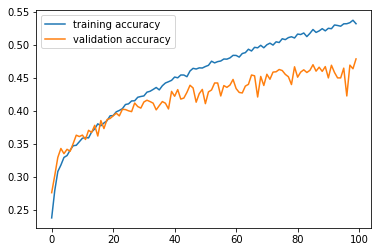

In [20]:
plt.plot(history.history['categorical_accuracy'], label = 'training accuracy')
plt.plot(history.history['val_categorical_accuracy'], label = 'validation accuracy')
plt.legend()

Similar to including no penalty at all. What about the effect of more hidden layers?

In [21]:
ann_3hiddenlayer = create_model([100,100,100])
history = ann_3hiddenlayer.fit(Xtrain,ytrain, epochs = 100,verbose = 1,validation_split=0.2, batch_size=100)

adding hidden layer
adding hidden layer
adding hidden layer
adding hidden layer
Train on 25408 samples, validate on 6353 samples
Epoch 1/100
25408/25408 [==============================] - 1s 52us/step - loss: 1.9046 - categorical_accuracy: 0.2255 - val_loss: 1.8798 - val_categorical_accuracy: 0.2352
Epoch 2/100
25408/25408 [==============================] - 1s 44us/step - loss: 1.8684 - categorical_accuracy: 0.2452 - val_loss: 1.8427 - val_categorical_accuracy: 0.2594
Epoch 3/100
25408/25408 [==============================] - 1s 42us/step - loss: 1.8300 - categorical_accuracy: 0.2747 - val_loss: 1.8062 - val_categorical_accuracy: 0.3112
Epoch 4/100
25408/25408 [==============================] - 1s 44us/step - loss: 1.7965 - categorical_accuracy: 0.3012 - val_loss: 1.7943 - val_categorical_accuracy: 0.2847
Epoch 5/100
25408/25408 [==============================] - 1s 43us/step - loss: 1.7657 - categorical_accuracy: 0.3179 - val_loss: 1.7403 - val_categorical_accuracy: 0.3335
Epoch 6/100

Epoch 48/100
25408/25408 [==============================] - 1s 45us/step - loss: 1.2952 - categorical_accuracy: 0.5027 - val_loss: 1.3815 - val_categorical_accuracy: 0.4700
Epoch 49/100
25408/25408 [==============================] - 1s 43us/step - loss: 1.2735 - categorical_accuracy: 0.5096 - val_loss: 1.3964 - val_categorical_accuracy: 0.4681
Epoch 50/100
25408/25408 [==============================] - 1s 44us/step - loss: 1.2705 - categorical_accuracy: 0.5116 - val_loss: 1.3845 - val_categorical_accuracy: 0.4702
Epoch 51/100
25408/25408 [==============================] - 1s 46us/step - loss: 1.2556 - categorical_accuracy: 0.5166 - val_loss: 1.3970 - val_categorical_accuracy: 0.4681
Epoch 52/100
25408/25408 [==============================] - 1s 47us/step - loss: 1.2541 - categorical_accuracy: 0.5155 - val_loss: 1.3838 - val_categorical_accuracy: 0.4653
Epoch 53/100
25408/25408 [==============================] - 1s 46us/step - loss: 1.2457 - categorical_accuracy: 0.5170 - val_loss: 1.38

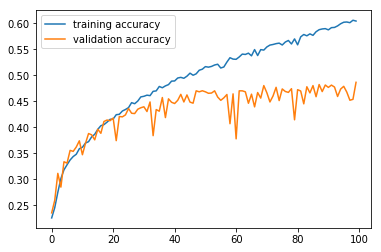

In [22]:
plt.plot(history.history['categorical_accuracy'], label = 'training accuracy')
plt.plot(history.history['val_categorical_accuracy'], label = 'validation accuracy')
plt.legend()

In [23]:
ann_3hiddenlayer = create_model([500,500,500])
history = ann_3hiddenlayer.fit(Xtrain,ytrain, epochs = 200,verbose = 1,validation_split=0.2, batch_size=100)

adding hidden layer
adding hidden layer
adding hidden layer
adding hidden layer
Train on 25408 samples, validate on 6353 samples
Epoch 1/200
25408/25408 [==============================] - 1s 59us/step - loss: 1.8858 - categorical_accuracy: 0.2359 - val_loss: 1.8413 - val_categorical_accuracy: 0.2805
Epoch 2/200
25408/25408 [==============================] - 1s 49us/step - loss: 1.8292 - categorical_accuracy: 0.2790 - val_loss: 1.8004 - val_categorical_accuracy: 0.3181
Epoch 3/200
25408/25408 [==============================] - 1s 50us/step - loss: 1.7804 - categorical_accuracy: 0.3126 - val_loss: 1.7716 - val_categorical_accuracy: 0.3005
Epoch 4/200
25408/25408 [==============================] - 1s 49us/step - loss: 1.7519 - categorical_accuracy: 0.3266 - val_loss: 1.7157 - val_categorical_accuracy: 0.3480
Epoch 5/200
25408/25408 [==============================] - 2s 61us/step - loss: 1.7233 - categorical_accuracy: 0.3429 - val_loss: 1.7053 - val_categorical_accuracy: 0.3493
Epoch 6/200

Epoch 48/200
25408/25408 [==============================] - 1s 48us/step - loss: 1.1184 - categorical_accuracy: 0.5819 - val_loss: 1.3738 - val_categorical_accuracy: 0.4807
Epoch 49/200
25408/25408 [==============================] - 1s 49us/step - loss: 1.1092 - categorical_accuracy: 0.5828 - val_loss: 1.3501 - val_categorical_accuracy: 0.4854
Epoch 50/200
25408/25408 [==============================] - 1s 49us/step - loss: 1.1040 - categorical_accuracy: 0.5872 - val_loss: 1.4390 - val_categorical_accuracy: 0.4569
Epoch 51/200
25408/25408 [==============================] - 1s 49us/step - loss: 1.0838 - categorical_accuracy: 0.5943 - val_loss: 1.5188 - val_categorical_accuracy: 0.4516
Epoch 52/200
25408/25408 [==============================] - 1s 49us/step - loss: 1.0879 - categorical_accuracy: 0.5947 - val_loss: 1.5042 - val_categorical_accuracy: 0.4267
Epoch 53/200
25408/25408 [==============================] - 1s 49us/step - loss: 1.0938 - categorical_accuracy: 0.5923 - val_loss: 1.58

25408/25408 [==============================] - 1s 48us/step - loss: 0.2346 - categorical_accuracy: 0.9238 - val_loss: 2.3625 - val_categorical_accuracy: 0.4928
Epoch 143/200
25408/25408 [==============================] - 1s 49us/step - loss: 0.2113 - categorical_accuracy: 0.9346 - val_loss: 2.3252 - val_categorical_accuracy: 0.4969
Epoch 144/200
25408/25408 [==============================] - 1s 48us/step - loss: 0.1839 - categorical_accuracy: 0.9451 - val_loss: 2.5134 - val_categorical_accuracy: 0.4661
Epoch 145/200
25408/25408 [==============================] - 1s 48us/step - loss: 0.1910 - categorical_accuracy: 0.9420 - val_loss: 2.3704 - val_categorical_accuracy: 0.5067
Epoch 146/200
25408/25408 [==============================] - 1s 50us/step - loss: 0.1547 - categorical_accuracy: 0.9558 - val_loss: 2.3518 - val_categorical_accuracy: 0.4917
Epoch 147/200
25408/25408 [==============================] - 1s 48us/step - loss: 0.1853 - categorical_accuracy: 0.9442 - val_loss: 2.4738 - val

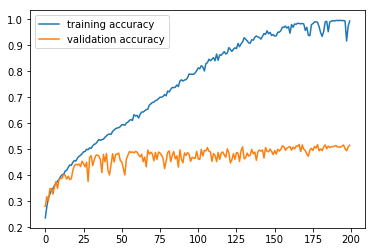

In [24]:
plt.plot(history.history['categorical_accuracy'], label = 'training accuracy')
plt.plot(history.history['val_categorical_accuracy'], label = 'validation accuracy')
plt.legend()

Well they certainly train faster but do they predict better? Maybe not. There's a ton of options here. How about if we just do some hyperparemter tuning. Normally we'd like to do cross validation or something similar for this but since training is slow on neural networks I'll just make one validation set and try and use grid search on the validation accuracy to select the best model.

In [25]:
def create_tunable_model(n_hidden_layers, n_nodes, l2, activation_function):
    model = Sequential()
    for layer in range(n_hidden_layers):
        if layer == 0:
            model.add(Dense(n_nodes, input_dim=2304, activation=activation_function,
                            kernel_regularizer=regularizers.l2(l2)))
        else:
            model.add(Dense(n_nodes, input_dim=n_nodes, activation=activation_function,
                            kernel_regularizer=regularizers.l2(l2)))
    model.add(Dense(7,input_dim = n_nodes,activation='softmax', kernel_regularizer=regularizers.l2(l2)))
    model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics=['categorical_accuracy'])
    return model

In [26]:
n_hidden_layers = [3, 5]
n_nodes = [200,500]
l2 = [0,.001,.01]
activation_function = ['tanh','relu']
param_grid = dict(n_hidden_layers = n_hidden_layers, 
                  n_nodes=n_nodes,
                 l2 = l2,
                 activation_function = activation_function)

In [27]:
from sklearn.model_selection import ParameterGrid
param_grid = ParameterGrid(param_grid)

In [29]:
results = []
Xtrain2, ytrain2 = Xtrain.iloc[7000:,:],ytrain[7000:]
Xval, yval = Xtrain.iloc[:7000,:],ytrain[:7000]
for settings in param_grid:
    mod = create_tunable_model(settings['n_hidden_layers'], settings['n_nodes'], 
                               settings['l2'], settings['activation_function'])
    history = mod.fit(Xtrain2,ytrain2, verbose= 0, epochs = 50, batch_size = 100, validation_data=(Xval, yval))
    results.append((settings,history.history['val_categorical_accuracy'][-1]))
    print(history.history['val_categorical_accuracy'][-1])

0.43599999802453177
0.4465714241777148
0.4501428540263857
0.4679999985865184
0.44657142545495715
0.43614285460540225
0.4482857103858675
0.4569999950272696
0.34314285921198984
0.34642857249294007
0.3458571461694581
0.3375714302062988
0.45971428368772776
0.47242856877190725
0.47085713914462496
0.4788571400301797
0.4494285685675485
0.4715714258807046
0.46971428394317627
0.44214285569531575
0.37214285816465104
0.38542856999805997
0.3032857154096876
0.3177142877663885


In [30]:
results = sorted(results, key = lambda x: x[1])
for r in results[-5:]:
    print(r)

({'activation_function': 'relu', 'l2': 0.001, 'n_hidden_layers': 5, 'n_nodes': 200}, 0.46971428394317627)
({'activation_function': 'relu', 'l2': 0, 'n_hidden_layers': 5, 'n_nodes': 200}, 0.47085713914462496)
({'activation_function': 'relu', 'l2': 0.001, 'n_hidden_layers': 3, 'n_nodes': 500}, 0.4715714258807046)
({'activation_function': 'relu', 'l2': 0, 'n_hidden_layers': 3, 'n_nodes': 500}, 0.47242856877190725)
({'activation_function': 'relu', 'l2': 0, 'n_hidden_layers': 5, 'n_nodes': 500}, 0.4788571400301797)


For these settings and choices the best model used no regularization, relu activiation, 5 hidden layers, and 500 nodes. I suspect this might have to do with the constant 100 training epochs, but nonetheless lets try it out. Now I will train on the full training set, and put the test set as validation data. Just to observe how predictive accuracy changes over time on both of these sets. Note that the model is not tuning using these validation numbers, it's strictly for reporting purposes

In [31]:
final_model = create_tunable_model(n_hidden_layers = 5, n_nodes = 500, l2 = 0, activation_function = 'relu')
history = final_model.fit(Xtrain,ytrain, epochs = 100,verbose = 1, batch_size=100, validation_data=(Xtest, ytest))

Train on 31761 samples, validate on 7178 samples
Epoch 1/100
31761/31761 [==============================] - 3s 110us/step - loss: 1.8908 - categorical_accuracy: 0.2336 - val_loss: 1.8572 - val_categorical_accuracy: 0.2721
Epoch 2/100
31761/31761 [==============================] - 2s 65us/step - loss: 1.8313 - categorical_accuracy: 0.2764 - val_loss: 1.7807 - val_categorical_accuracy: 0.3073
Epoch 3/100
31761/31761 [==============================] - 2s 66us/step - loss: 1.7747 - categorical_accuracy: 0.3167 - val_loss: 1.7254 - val_categorical_accuracy: 0.3508
Epoch 4/100
31761/31761 [==============================] - 2s 64us/step - loss: 1.7342 - categorical_accuracy: 0.3369 - val_loss: 1.7420 - val_categorical_accuracy: 0.3282
Epoch 5/100
31761/31761 [==============================] - 2s 64us/step - loss: 1.7002 - categorical_accuracy: 0.3494 - val_loss: 1.7513 - val_categorical_accuracy: 0.3144
Epoch 6/100
31761/31761 [==============================] - 2s 64us/step - loss: 1.6705 - c

31761/31761 [==============================] - 2s 66us/step - loss: 0.3321 - categorical_accuracy: 0.8843 - val_loss: 2.6255 - val_categorical_accuracy: 0.4358
Epoch 96/100
31761/31761 [==============================] - 2s 64us/step - loss: 0.3004 - categorical_accuracy: 0.8951 - val_loss: 2.6623 - val_categorical_accuracy: 0.4486
Epoch 97/100
31761/31761 [==============================] - 2s 66us/step - loss: 0.2990 - categorical_accuracy: 0.8954 - val_loss: 2.6380 - val_categorical_accuracy: 0.4309
Epoch 98/100
31761/31761 [==============================] - 2s 64us/step - loss: 0.2928 - categorical_accuracy: 0.8969 - val_loss: 2.6379 - val_categorical_accuracy: 0.4459
Epoch 99/100
31761/31761 [==============================] - 2s 64us/step - loss: 0.2965 - categorical_accuracy: 0.8948 - val_loss: 2.7927 - val_categorical_accuracy: 0.4422
Epoch 100/100
31761/31761 [==============================] - 2s 62us/step - loss: 0.2873 - categorical_accuracy: 0.8998 - val_loss: 2.9651 - val_cat

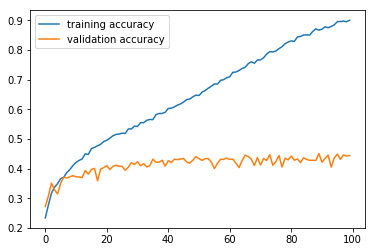

In [32]:
plt.plot(history.history['categorical_accuracy'], label = 'training accuracy')
plt.plot(history.history['val_categorical_accuracy'], label = 'validation accuracy')
plt.legend()

In [33]:
preds = np.argmax(final_model.predict(Xtest),axis = 1)
ytest = np.argmax(ytest,axis=1)
print(classification_report(y_true = ytest, y_pred = preds))
print('\n')
print('accuracy', np.round(np.mean(preds == ytest),2))
print('\n')
print('confusion matrix')
print(confusion_matrix(y_true = ytest, y_pred = preds))

             precision    recall  f1-score   support

          0       0.37      0.20      0.26       958
          1       0.57      0.39      0.46       111
          2       0.29      0.43      0.35      1024
          3       0.53      0.70      0.60      1774
          4       0.37      0.26      0.31      1247
          5       0.60      0.58      0.59       831
          6       0.45      0.38      0.41      1233

avg / total       0.44      0.44      0.43      7178



accuracy 0.44


confusion matrix
[[ 190    7  236  225  141   44  115]
 [   6   43   15   21    2    7   17]
 [  72    7  443  171  126   88  117]
 [  65    2  176 1235  115   68  113]
 [  88    9  303  291  328   56  172]
 [  20    0  146  101   39  478   47]
 [  72    7  209  283  138   56  468]]


As we can see the model still has less than 50% accuracy. In fact the random forest model from the previous notebook outperformed the best performing neural network here, and this neural network was chosen using some hyperparameter tuning (which clearly overpredicted performance). Note however that we just used a simple neural network model here with only basic building blocks - there are lots of methods to improve neural network performance which will be explored in subsequent notebooks. This also illustrates the difficulty in training a neural network - compared to random forests, which require little tuning, neural networks have an endless list of things you could tune, and training is slow. Thus, even within a simple architecture similar to the one used here, it's highly likely that improvements to the model can be made.